In [14]:
import numpy as np
from matplotlib import pyplot as plt
import time
%matplotlib inline

# load and viz data

unsorted [[  1.001   5.02    3.952   1.729   4.99    4.905   5.179   1.282   4.469
    5.086   1.926   5.278   1.981   0.765   4.138   3.171   2.369   5.129
    2.088   3.577   4.366   2.108   2.832   4.17    2.31    1.387   4.941
    2.749   6.162   1.362]
 [-11.957  11.835  -7.136   9.299   6.074 -12.801 -12.795  -9.284  11.697
    7.809 -12.848   3.441  -2.326  -8.555  12.836  -2.683  13.039  -3.534
   11.491  11.521  -1.653   7.877 -11.688  11.902   6.081  -1.963  -7.01
   -4.161   1.058  -8.398]
 [  3.363  21.076  20.189 -22.37   15.364  -8.255  18.315 -17.443 -22.152
  -22.896  10.488  -0.194   9.046   2.816  -5.693  22.436  -3.768   3.823
   17.269 -16.296   4.865  22.782  -0.444 -22.908 -11.869  -6.819 -21.97
    5.828 -22.345  15.592]]


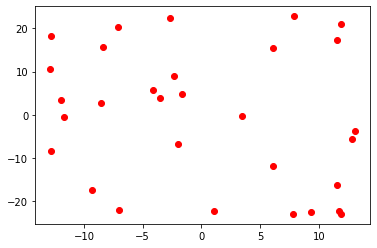

In [15]:
data = np.genfromtxt("./position_sample.csv",delimiter=";").T
print("unsorted",data)
idx = np.argsort(data[0])
rt = np.take(data[0], idx)
rx = np.take(data[1], idx)
ry = np.take(data[2], idx)
# print("sorted",data)
# print("rt", rt)
# print("rx", rx)
# print("ry", ry)
plt.scatter(rx,ry, color="red")

# init params

In [16]:
Nindiv = 1000


## precompute of selection mask

done with exponential smapling rejection

l is lower means softer, l is higher means harder

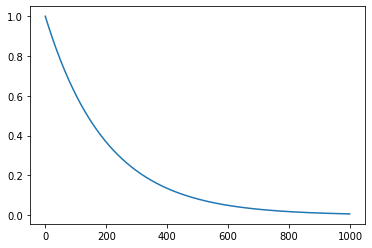

In [17]:
l = 5     # lower is softer
bias = 0.1
odsexp = np.exp(-1*l*np.linspace(0,1,Nindiv))
# odsexp = 1 - np.exp(-1*l*ods)
plt.plot(odsexp)


28.6 %
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True False  True False  True  True  True False  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True False  True False  True  True  True  True False  True  True False
  True False False  True  True  True False  True  True False  True  True
  True  True  True  True  True  True  True  True False False  True  True
  True  True  True  True  True False False  True  True False  True False
 False False  True  True  True  True  True  True  True False  True  True
  True False False False  True  True False False  True  True False False
 False False False  True False False False False  True False  True  True
  True False False False  True  True  True  

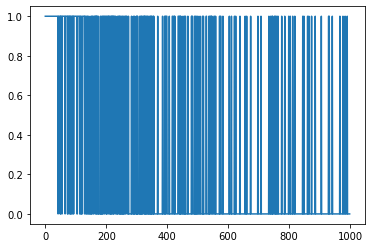

In [18]:
selectmask = odsexp>(np.random.rand(Nindiv)-bias)
plt.plot(selectmask)
print(np.sum(selectmask)*100/Nindiv,"%")
print(selectmask)

# define indiv list

In [19]:
# p1 = np.repeat(np.random.rand(Nindiv)*200 -100,len(rt),axis=1)
p1 = np.broadcast_to((np.random.rand(Nindiv)*200 -100)[...,None],(Nindiv,len(rt)) )
p2 = np.broadcast_to((np.random.rand(Nindiv)*200 -100)[...,None],(Nindiv,len(rt)) )
p3 = np.broadcast_to((np.random.rand(Nindiv)*200 -100)[...,None],(Nindiv,len(rt)) )
p4 = np.broadcast_to((np.random.rand(Nindiv)*200 -100)[...,None],(Nindiv,len(rt)) )
p5 = np.broadcast_to((np.random.rand(Nindiv)*200 -100)[...,None],(Nindiv,len(rt)) )
p6 = np.broadcast_to((np.random.rand(Nindiv)*200 -100)[...,None],(Nindiv,len(rt)) )
loss = np.ones(Nindiv)*np.inf
print("p1",p1.shape)
print("loss",loss.shape)
# print(p1)
# print(p1[0],p2[0][0],p3[0][0],p4[0][0],p5[0][0],p6[0][0])

p1 (1000, 30)
loss (1000,)


In [20]:
def r(x):
    return int(np.ceil(x / 0.5)) * 0.5

def prettyprint()->None:
    for i in range(Nindiv):
        print(loss[i],r(p1[i][0]),r(p2[i][0]),r(p3[i][0]),r(p4[i][0]),r(p5[i][0]),r(p6[i][0]))
prettyprint()

inf 95.0 94.5 -40.5 -81.5 98.0 91.0
inf 59.5 -96.5 19.0 -77.0 59.5 82.5
inf -96.0 92.0 -40.5 68.5 -73.0 69.5
inf -72.5 92.5 -7.5 -92.0 38.5 -10.5
inf 70.0 -83.0 -38.5 -55.0 13.5 -79.5
inf -76.0 -16.5 -42.5 -83.0 -23.5 -84.0
inf -66.0 -32.0 -54.5 -58.0 -82.0 -58.0
inf 76.0 4.5 14.0 -61.5 -98.5 13.0
inf -54.5 32.5 3.5 5.0 -51.5 -4.5
inf -28.0 -26.5 -44.0 93.5 -30.0 92.5
inf -16.0 -24.0 58.5 0.5 74.0 -81.0
inf 40.5 2.5 -94.5 -29.5 96.5 37.0
inf 79.5 1.0 -36.5 2.5 -86.0 98.5
inf -28.0 -83.5 -1.0 -67.0 -11.5 73.5
inf -21.0 -8.0 -62.0 -94.5 -32.0 -88.0
inf -98.0 -56.0 35.5 -12.0 -82.5 0.0
inf 66.5 20.0 57.0 -38.5 64.0 55.5
inf -14.0 -75.0 -94.0 -16.0 29.0 68.5
inf 82.5 78.0 -49.0 31.5 86.5 -28.0
inf 61.0 -43.5 -84.0 32.0 -61.0 -55.5
inf -21.0 60.5 44.5 -5.0 -25.0 -16.5
inf 82.0 -66.0 58.0 99.0 -45.0 -89.0
inf 61.0 22.0 56.0 -17.5 74.5 15.5
inf 46.5 -55.5 6.0 49.5 -55.5 -84.0
inf -60.5 -92.5 -82.0 12.0 -40.0 -67.5
inf -37.0 80.0 -23.5 58.5 15.0 -36.0
inf 30.5 -44.5 -99.0 -91.0 -31.5 -83.0
inf

# shape data to pop size

In [21]:
RT = np.tile(rt, (Nindiv,1))
RX = np.tile(rx, (Nindiv,1))
RY = np.tile(ry, (Nindiv,1))
print("RT shape:",RT.shape,RT)
# print("RX",RX)
# print("RY",RY)

RT shape: (1000, 30) [[0.765 1.001 1.282 ... 5.179 5.278 6.162]
 [0.765 1.001 1.282 ... 5.179 5.278 6.162]
 [0.765 1.001 1.282 ... 5.179 5.278 6.162]
 ...
 [0.765 1.001 1.282 ... 5.179 5.278 6.162]
 [0.765 1.001 1.282 ... 5.179 5.278 6.162]
 [0.765 1.001 1.282 ... 5.179 5.278 6.162]]


# crossover

get coordinates of selected indivs and asign thel to each other

In [26]:
idxNotSelect = np.nonzero(selectmask==0)
idxNotSelect = idxNotSelect[0]
np.random.shuffle(idxNotSelect)

splitvalue = len(idxNotSelect)//2
idxChildren = idxNotSelect[:splitvalue]
idxNew = idxNotSelect[splitvalue:]

idxselect = np.nonzero(selectmask)
idxSelectParent = idxselect[0][:2*len(idxChildren)]
np.random.shuffle(idxSelectParent)
idxParentA = idxselect[:len(idxSelectParent)//2]
idxParentB = idxselect[len(idxSelectParent)//2:]

# maskChildren = np.zeros(Nindiv, dtype=int) do we need mask?
print("child", len(idxChildren))
print("parentA", len(idxParentA))
print("SelectParent", len(idxSelectParent))
print("before",p1)
p1[idxChildren] = p1[idxParentA]
print("after",p1)


child 357
parentA 1
SelectParent 286
before [[  2.27523421   2.27523421   2.27523421 ...   2.27523421   2.27523421
    2.27523421]
 [ -2.26110775  -2.26110775  -2.26110775 ...  -2.26110775  -2.26110775
   -2.26110775]
 [  3.8411718    3.8411718    3.8411718  ...   3.8411718    3.8411718
    3.8411718 ]
 ...
 [-84.93248493 -84.93248493 -84.93248493 ... -84.93248493 -84.93248493
  -84.93248493]
 [-84.93248493 -84.93248493 -84.93248493 ... -84.93248493 -84.93248493
  -84.93248493]
 [-84.93248493 -84.93248493 -84.93248493 ... -84.93248493 -84.93248493
  -84.93248493]]


ValueError: shape mismatch: value array of shape (286,30) could not be broadcast to indexing result of shape (357,30)

# evaluation


In [22]:
# def evaluate()->None:
#     global loss     
start = time.time()  
xs = p1*np.sin((p2*RT)+p3)
ys = p4*np.sin((p5*RT)+p6)
errorx = (xs-RX)**2   # square penalises more the outliers then small errors
errory = (ys-RY)**2
loss = np.sum(errorx, axis=1) + np.sum(errory, axis=1)
stop = time.time()
print("time taken", stop-start)
print("xs",xs.shape)
print("loss:=", loss.shape, loss.mean(axis=0))
prettyprint()

time taken 0.001657247543334961
xs (1000, 30)
loss:= (1000,) 114515.88594366256
225637.48829653865 95.0 94.5 -40.5 -81.5 98.0 91.0
141255.8496298932 59.5 -96.5 19.0 -77.0 59.5 82.5
250547.6163195595 -96.0 92.0 -40.5 68.5 -73.0 69.5
217633.1965576029 -72.5 92.5 -7.5 -92.0 38.5 -10.5
125145.33947381613 70.0 -83.0 -38.5 -55.0 13.5 -79.5
169838.78981867584 -76.0 -16.5 -42.5 -83.0 -23.5 -84.0
108405.97984996095 -66.0 -32.0 -54.5 -58.0 -82.0 -58.0
150465.36356057512 76.0 4.5 14.0 -61.5 -98.5 13.0
57233.94206735672 -54.5 32.5 3.5 5.0 -51.5 -4.5
119383.53174607868 -28.0 -26.5 -44.0 93.5 -30.0 92.5
13208.909459362083 -16.0 -24.0 58.5 0.5 74.0 -81.0
57353.26356879961 40.5 2.5 -94.5 -29.5 96.5 37.0
107515.04047237265 79.5 1.0 -36.5 2.5 -86.0 98.5
86283.13536275318 -28.0 -83.5 -1.0 -67.0 -11.5 73.5
166363.35284330868 -21.0 -8.0 -62.0 -94.5 -32.0 -88.0
155619.34731860494 -98.0 -56.0 35.5 -12.0 -82.5 0.0
93359.10619185188 66.5 20.0 57.0 -38.5 64.0 55.5
20334.485198917308 -14.0 -75.0 -94.0 -16.0 29.0

# sort

In [23]:
start = time.time()
indx = np.argsort(loss)
loss = np.take(loss, indx)
p1 = np.take(p1, indx,axis=0)
p2 = np.take(p2, indx,axis=0)
p3 = np.take(p3, indx,axis=0)
p4 = np.take(p4, indx,axis=0)
p5 = np.take(p5, indx,axis=0)
p6 = np.take(p6, indx,axis=0)
stop = time.time()
print("time taken", stop-start)
# print(loss)
prettyprint()


time taken 0.000934600830078125
9125.56688741284 1.5 17.5 18.5 -5.0 -28.5 78.5
9546.917061786708 -3.0 -82.0 -61.5 0.5 -94.0 79.5
9633.044650658923 3.0 11.0 -84.0 0.0 96.0 -20.0
9774.896103946061 4.0 67.0 93.5 -0.5 74.0 -47.0
9933.459403416446 -3.5 24.0 -11.5 1.0 -79.5 -62.0
10050.309377760634 -4.0 74.5 -25.0 1.0 -63.0 -48.5
10229.081728302048 5.0 79.5 34.0 6.5 -85.0 58.5
10282.173495408293 0.5 84.5 -23.0 7.5 -70.0 -50.0
10406.443850726708 8.0 5.0 -39.0 8.0 64.0 -9.0
10453.083992604154 3.0 14.5 74.5 13.5 72.0 63.0
10625.057719225602 -2.0 49.0 18.5 10.0 -85.0 46.0
10920.845466745823 -11.0 39.0 -55.0 -3.5 -46.5 16.0
11094.894761508916 4.5 -72.0 -89.0 -7.0 -61.0 71.0
11276.950968539788 -2.5 88.5 92.0 -12.5 -85.0 -16.0
11760.449668947163 -7.0 -48.5 87.0 13.0 2.5 89.5
11888.643266849289 9.5 46.5 12.5 -8.5 -38.0 1.0
11909.3574943194 10.5 -95.0 -14.0 3.0 -30.0 -27.5
12397.75907461399 15.0 50.5 -40.0 7.5 -84.0 -94.5
12455.500682421167 13.0 -25.0 -90.5 -17.5 -63.5 -1.0
12621.996291553294 12.0 34

# mutate

In [24]:
# m1 = np.broadcast_to(0.9+(np.random.rand(Nindiv)/5)[...,None],(Nindiv,len(rt)) )
# print(m1)
print(p1[selectmask][:2])
start = time.time()
p1[selectmask]+=np.random.randn(1)
p2[selectmask]+=np.random.randn(1)
p3[selectmask]+=np.random.randn(1)
p4[selectmask]+=np.random.randn(1)
p5[selectmask]+=np.random.randn(1)
p6[selectmask]+=np.random.randn(1)
stop = time.time()
print("time taken", stop-start)
print(p1[selectmask][:2])
print("p1 ",p1.shape)

[[ 1.22772416  1.22772416  1.22772416  1.22772416  1.22772416  1.22772416
   1.22772416  1.22772416  1.22772416  1.22772416  1.22772416  1.22772416
   1.22772416  1.22772416  1.22772416  1.22772416  1.22772416  1.22772416
   1.22772416  1.22772416  1.22772416  1.22772416  1.22772416  1.22772416
   1.22772416  1.22772416  1.22772416  1.22772416  1.22772416  1.22772416]
 [-3.3086178  -3.3086178  -3.3086178  -3.3086178  -3.3086178  -3.3086178
  -3.3086178  -3.3086178  -3.3086178  -3.3086178  -3.3086178  -3.3086178
  -3.3086178  -3.3086178  -3.3086178  -3.3086178  -3.3086178  -3.3086178
  -3.3086178  -3.3086178  -3.3086178  -3.3086178  -3.3086178  -3.3086178
  -3.3086178  -3.3086178  -3.3086178  -3.3086178  -3.3086178  -3.3086178 ]]
time taken 0.0011701583862304688
[[ 2.27523421  2.27523421  2.27523421  2.27523421  2.27523421  2.27523421
   2.27523421  2.27523421  2.27523421  2.27523421  2.27523421  2.27523421
   2.27523421  2.27523421  2.27523421  2.27523421  2.27523421  2.27523421
   2.2

# create new indiv

In [25]:
start = time.time()
p1[(selectmask==0)] = (np.random.rand(1)*200 -100)
p2[(selectmask==0)] = (np.random.rand(1)*200 -100)
p3[(selectmask==0)] = (np.random.rand(1)*200 -100)
p4[(selectmask==0)] = (np.random.rand(1)*200 -100)
p5[(selectmask==0)] = (np.random.rand(1)*200 -100)
p6[(selectmask==0)] = (np.random.rand(1)*200 -100)
stop = time.time()
print("time taken", stop-start)
print("p1 ",p1.shape)

time taken 0.0008623600006103516
p1  (1000, 30)
